In [1]:
%pylab inline
import pandas as pd
import grispy as gsp
import healpy as hp 
import programas as pg
import numpy as np
from multiprocessing import Pool
import MAS_library as MASL
import h5py
import smoothing_library as SL

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np

dims = 20  # Definir el tamaño de las dimensiones
middle = dims // 2
R2 = 4**2  # Definir el radio al cuadrado
field = np.zeros((dims, dims, dims), dtype=np.float32)
normalization = 0.0


for i in range(dims):
    i1 = i
    if i1 > middle:
        i1 = i1 - dims
    for j in range(dims):
        j1 = j
        if j1 > middle:
            j1 = j1 - dims
        for l in range(dims):
            l1 = l
            if l1 > middle:
                l1 = l1 - dims
            d2 = i1 * i1 + j1 * j1 + l1 * l1
            if d2 <= R2:
                field[i, j, l] = 1.0
                normalization += 1.0

In [3]:
plt.imshow(field[5,:,:])
plt.colorbar()

In [4]:
import numpy as np

# Definir el tamaño de las dimensiones y otros parámetros
dims = 10
middle = dims // 2
R2 = 3**2  # Radio al cuadrado
field = np.zeros((dims, dims, dims), dtype=np.float32)

# Crear una grilla de coordenadas centradas
x = np.arange(dims) - middle
y = np.arange(dims) - middle
z = np.arange(dims) - middle
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Calcular la distancia al cuadrado desde el centro
d2 = X**2 + Y**2 + Z**2

# Establecer el campo donde la distancia al cuadrado es menor o igual a R2
field[d2 <= R2] = 1.0

# Calcular la normalización
normalization = np.sum(field)

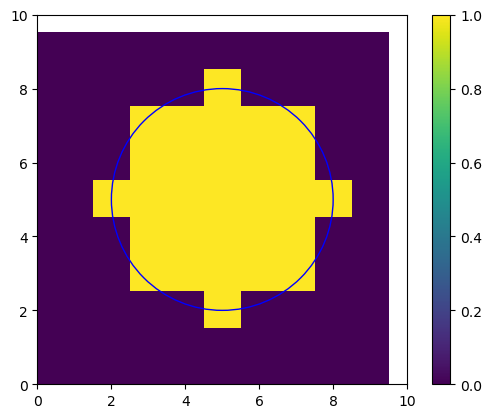

In [5]:
import matplotlib.pyplot as plt

# Parámetros del círculo
center = (5, 5)  # Centro del círculo
radius = 3.0  # Radio del círculo

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear un círculo
circle = plt.Circle(center, radius, edgecolor='b', facecolor='none')

# Añadir el círculo a los ejes
ax.add_patch(circle)

# Establecer los límites de los ejes
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Establecer la proporción igual para que el círculo no se deforme
ax.set_aspect('equal')

plt.imshow(field[5,:,:])

plt.colorbar()

# Añadir la cuadrícula para mejor visualización
#plt.grid(True)